# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les a√±adi√≥ informaci√≥n meteorol√≥gica, y el calendario de festivos.

Ahora buscan analizar cu√°les son los aspectos que m√°s influyen en la cantidad de bicis que van a alquilar en un d√≠a.

In [156]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable as stb

# Gr√°ficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Asunciones y Preprocesamiento
from scipy import stats
import math
from scipy.stats import levene
#import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Linear Regresion con Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Configuraci√≥n warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

In [157]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
92        93  03-04-2018  summer   0  ...  12.208271    1651        1598  3249
182      183  02-07-2018  autumn   0  ...   7.709154    2204        2915  5119
493      494  09-05-2019  summer   1  ...  14.499604     620        4097  4717
215      216  04-08-2018  autumn   0  ...  13.209050     799        3777  4576
355      356  22-12-2018  spring   0  ...   3.167425     227        2841  3068
622      623  15-09-2019  autumn   1  ...  16.583907    3160        5554  8714

[6 rows x 16 columns]

---------

In [158]:
#df_bike.stb.counts().T

In [159]:
df_bike.describe()

instant          yr  ...   registered          cnt
count  730.000000  730.000000  ...   730.000000   730.000000
mean   365.500000    0.500000  ...  3658.757534  4508.006849
std    210.877136    0.500343  ...  1559.758728  1936.011647
min      1.000000    0.000000  ...    20.000000    22.000000
25%    183.250000    0.000000  ...  2502.250000  3169.750000
50%    365.500000    0.500000  ...  3664.500000  4548.500000
75%    547.750000    1.000000  ...  4783.250000  5966.000000
max    730.000000    1.000000  ...  6946.000000  8714.000000

[8 rows x 14 columns]

In [160]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


> - <font color = violet> NO TENEMOS NULOS
> -  730 filas
> - 17 columnas
- **Holiday** : 1 = festivo / 0 = no festivo
- **Weekday** = 0 Domingo - 6 S√°bado
- **Workingday** = 1 laborable / 0 finde
- **Weathersit** = grados en el readme
- **Temperatura** = 
- **Humedad** =
- **Viento** = 
- **Casual** = n¬∫ de usuarios no registrados/d√≠a
- **Registered** = n¬∫ de usuarios registrados/d√≠a
- **Total** = total de usuarios/d√≠a



# REVISI√ìN DE COLUMNAS:

### 1. FECHA:
- Tenemos "yr" (a√±o) y "mnth" (mes) y obtenemos "day" a trav√©s de la separaci√≥n de "dteday", que posteriormente eliminaremos:

In [161]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [162]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

------

### 2. Columna "season"
- Corregir de acuerdo con las fechas.

In [163]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [164]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [165]:
df_bike['season'] = df_bike['dteday'].apply(meses)

In [166]:
df_bike.sample(5)

instant     dteday  season  yr  ...  windspeed casual  registered   cnt
338      339 2018-05-12  spring   0  ...   4.167956    233        3578  3811
216      217 2018-05-08  spring   0  ...  12.374632   1023        3843  4866
680      681 2019-12-11  autumn   1  ...  11.625639   1097        5172  6269
618      619 2019-11-09  autumn   1  ...   6.167631   1070        6697  7767
259      260 2018-09-17  summer   0  ...  12.708225   1434        3077  4511

[5 rows x 17 columns]

 - Antes de codificarla hacemos una gr√°fica para ver c√≥mo se reparte el alquiler de bicicletas durante las estaciones.

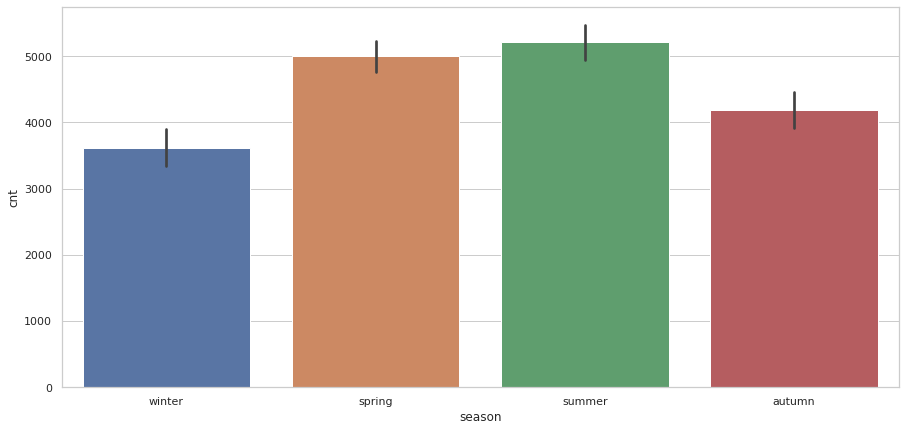

In [167]:
plt.figure(figsize=(15,7))
sns.set_theme(style= "whitegrid")
ax = sns.barplot(x = "season", y="cnt", data= df_bike)

 - Encoding num√©rico para la columna season

In [168]:
scale_mapper = {"winter":1, "spring":1, "summer":2, 'autumn':3}

df_bike['season_encoding'] = df_bike["season"].replace(scale_mapper)

- Hacemos una peque√±a exploraci√≥n preliminar con "season": ¬øCu√°ntas reservas se hacen por estaci√≥n y por tipo de cliente?

In [169]:
x= df_bike.groupby(['season']).agg({'cnt': ['sum'],'casual': ['sum'],'registered': ['sum']}).stb.subtotal()
x

cnt  casual registered
                 sum     sum        sum
season                                 
autumn        771700  128069     643631
spring        909613  192850     716763
summer        958925  187579     771346
winter        650607  111454     539153
grand_total  3290845  619952    2670893

<AxesSubplot:xlabel='registered', ylabel='season'>

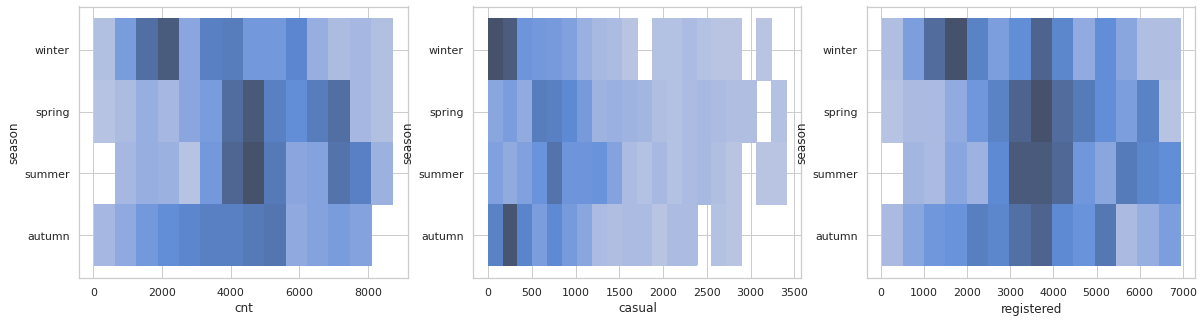

In [170]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(data=df_bike, x="cnt",y="season",ax=axes[0])
sns.histplot(data=df_bike, x="casual",y="season",ax=axes[1])
sns.histplot(data=df_bike, x="registered",y="season",ax=axes[2])

#HAY MAS RESERVAS DE GENTE REGISTRADA QUE CASUAL

--------

### 3. Columna "year" 

([<matplotlib.axis.XTick at 0x7f3055188da0>,
 [Text(0, 0, '2018'), Text(1, 0, '2019')])

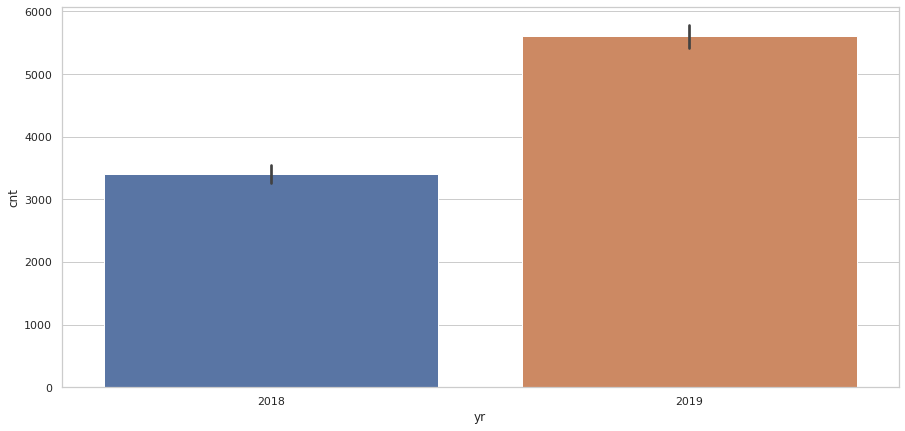

In [171]:
plt.figure(figsize=(15,7))
sns.set_theme(style= "whitegrid")
sns.barplot(x = "yr", y="cnt", data= df_bike)
plt.xticks([0, 1], ["2018", "2019"])

----

### 4. "Month" -> Exploraci√≥n preliminar: reservas por mes.

<AxesSubplot:xlabel='mnth', ylabel='casual'>

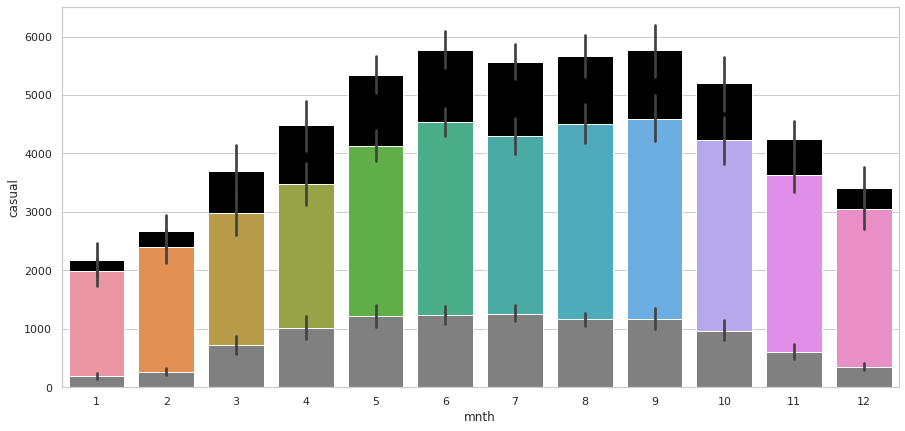

In [172]:
plt.figure(figsize=(15,7))
sns.set_theme(style= "whitegrid")
sns.barplot(x = "mnth", y ="cnt", data= df_bike, color = "black")

sns.barplot(x = "mnth", y="registered", data= df_bike)
sns.barplot(x = "mnth", y="casual", data= df_bike, color = "grey")
#plt.xticks([0, 1], ["2018", "2019"])

----

### 5. "Holiday"
1 = festivo /  0 = no festivo

df_bike.groupby(["holiday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)


Observamos: 
- M√°s reservas en NO FESTIVOS
- HAY MAYOR NUMERO DE RESERVAS LOS NO FESTIVOS
- Adem√°s:
    - SUMA EN NO FESTIVO
         - REGISTRADOS 2.614.817 RESERVAS EN NO FESTIVO
         - CASUAL 597.593 RESERVAS EN NO FESTIVO

    - SUMA EN FESTIVO
        - REGISTRADOS 56.076 RESERVAS EN  FESTIVO
        - CASUAL 22.359 RESERVAS EN NO FESTIVO

<AxesSubplot:xlabel='holiday', ylabel='count'>

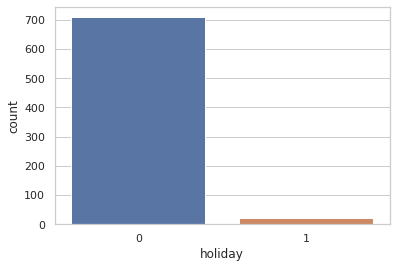

In [173]:
sns.countplot(x='holiday', data=df_bike)

-----

### 6. "Weekday" 
- 1-LUNES / 2-MARTES / 3-MIERCOLES / 4- JUEVES / 5-VIERNES / 6-S√ÅBADO / 0 -DOMINGO 

     Hay bastante igualdad entre los dias de la semana, siendo el ranking de m√°s a menos reservas:
     ORDEN DE DIAS POR RESERVA: Viernes, jueves,sabado, miercoles,martes,lunes y domingo.


In [174]:
df_bike.groupby(["weekday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)

cnt                      ... registered                     
                min      max        sum  ...        max        sum      mean
weekday                                  ...                                
0             605.0   8227.0   444027.0  ...     5657.0   303506.0   2890.53
1              22.0   7525.0   455503.0  ...     6435.0   384719.0   3663.99
2             683.0   7767.0   469109.0  ...     6697.0   411266.0   3954.48
3             441.0   8173.0   471214.0  ...     6946.0   413960.0   4019.03
4             431.0   7804.0   485395.0  ...     6781.0   423935.0   4076.30
5            1167.0   8362.0   487790.0  ...     6917.0   409552.0   3938.00
6             627.0   8714.0   477807.0  ...     5966.0   323955.0   3085.29
grand_total  3976.0  56572.0  3290845.0  ...    45399.0  2670893.0  25627.62

[8 rows x 12 columns]

<AxesSubplot:xlabel='weekday', ylabel='registered'>

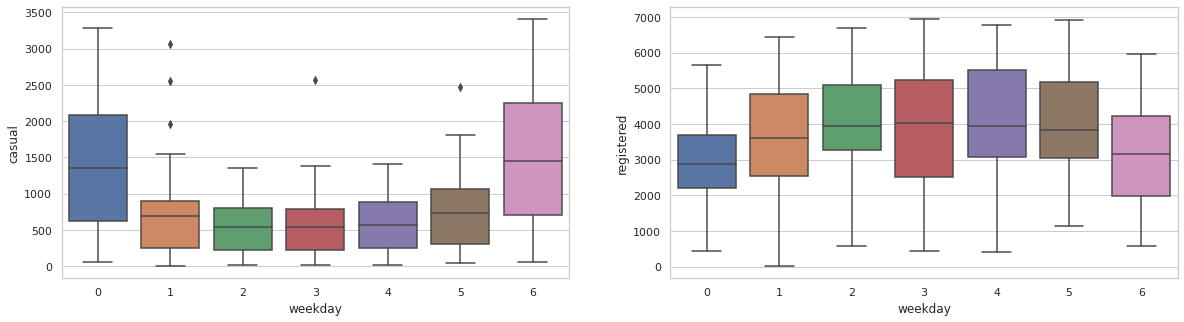

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(data=df_bike, x='weekday', y='casual',ax=axes[0])
sns.boxplot(data=df_bike, x='weekday', y='registered',ax=axes[1])

----

### 7. "workingday": 
- 1 - LABORABLE  /  0 -FIN DE SEMANA

In [176]:
df_bike.groupby(["workingday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# 1 dia laborable - hay muchas mas reservas en d√≠as laborables que festivos, m√°s de el doble.

cnt                      ... registered                    
               min      max        sum  ...        max        sum     mean
workingday                              ...                               
0            605.0   8714.0  1000269.0  ...     5966.0   683537.0  2959.03
1             22.0   8362.0  2290576.0  ...     6946.0  1987356.0  3982.68
grand_total  627.0  17076.0  3290845.0  ...    12912.0  2670893.0  6941.71

[3 rows x 12 columns]

---

### 8. "weathersit": 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [177]:
weather = pd.DataFrame(df_bike[["cnt", "weathersit"]].groupby("weathersit"))

In [178]:
i = 0
lista2 = []
for i in range(len(df_bike["weathersit"].value_counts())):
    a = weather[1][i]["cnt"].sum()
    i = i+1
    lista2.append(a)

In [179]:
weathersit = pd.DataFrame(lista2)
weathersit["%"] = weathersit[0].apply(lambda x: x / df_bike.shape[0] * 100)
weathersit["Tipo"] = ["1", "2", "3"]

In [180]:
labelsX = ["1: Clear, Few clouds, Partly cloudy, Partly cloudy", "2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"]


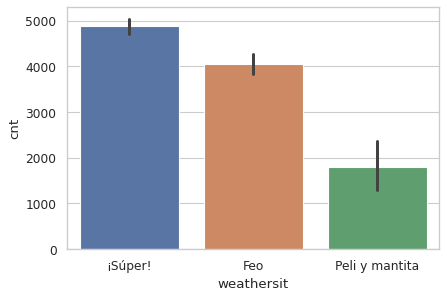

In [181]:
plt.figure(figsize=(6,4), dpi= 80)

sns.barplot(x = "weathersit", y = "cnt", data = df_bike)
plt.xticks([0, 1, 2], ["¬°S√∫per!", "Feo", "Peli y mantita"]);


---

### 9. Temperatura, Sensaci√≥n T√©rmica y Humedad

hay que hacer encoding con etiquetas para las graficas

In [182]:
df_bike.head(2)

instant     dteday  season  yr  ...  casual registered  cnt  season_encoding
0        1 2018-01-01  winter   0  ...     331        654  985                1
1        2 2018-02-01  winter   0  ...     131        670  801                1

[2 rows x 18 columns]

In [183]:
df_bike[['temp','atemp','hum']] = df_bike[['temp','atemp','hum']].round(1)

In [184]:
df_temp = df_bike[['temp','atemp']]
df_temp

temp  atemp
0    14.1   18.2
1    14.9   17.7
2     8.1    9.5
3     8.2   10.6
4     9.3   11.5
..    ...    ...
725  10.4   11.3
726  10.4   12.8
727  10.4   12.1
728  10.5   11.6
729   8.8   11.2

[730 rows x 2 columns]

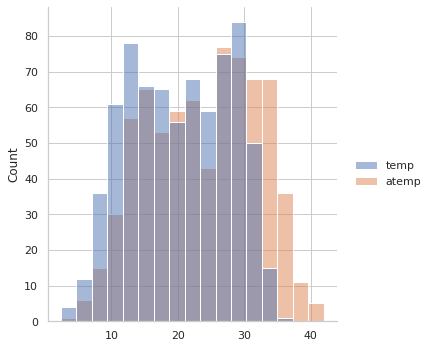

In [185]:
sns.displot(df_temp)

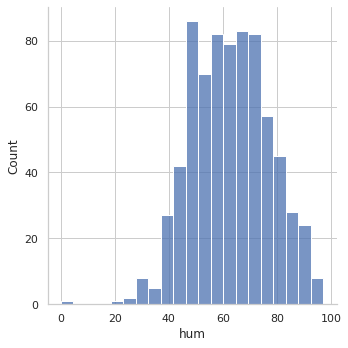

In [186]:
sns.displot(df_bike["hum"])

In [187]:
df_clima = df_bike[['temp','atemp','hum']]

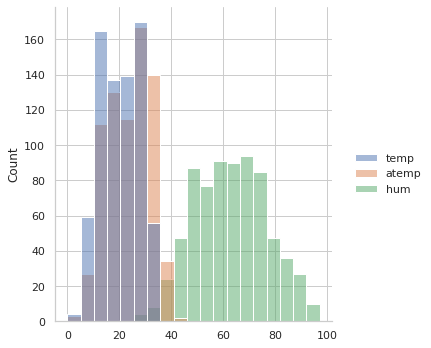

In [188]:
sns.displot(df_clima)

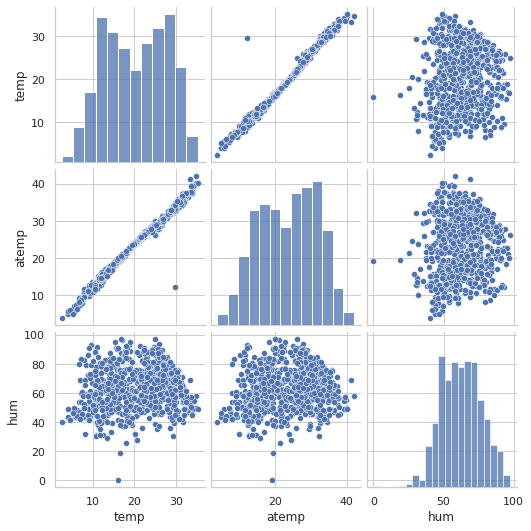

In [189]:
sns.pairplot(df_clima);

Voy a ver normalidad num√©ricamente

In [190]:
stats.shapiro(df_bike["atemp"])

ShapiroResult(statistic=0.9737697243690491, pvalue=3.6718658669165904e-10)

In [191]:
stats.shapiro(df_bike["temp"])

ShapiroResult(statistic=0.9657878279685974, pvalue=4.954737575085799e-12)

In [192]:
stats.shapiro(df_bike["hum"])

ShapiroResult(statistic=0.9933574795722961, pvalue=0.0025413876865059137)

Estas tres variables parecen normales

- Codificando variables

In [193]:
df_bike["temp_interval"] = pd.cut(df_bike["temp"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [194]:
df_bike.head(2)

instant     dteday  season  ...  cnt  season_encoding temp_interval
0        1 2018-01-01  winter  ...  985                1           low
1        2 2018-02-01  winter  ...  801                1           low

[2 rows x 19 columns]

In [195]:
df_bike["temp_interval_num"] = pd.cut(df_bike["temp"], 5, ordered=True)

In [196]:
df_bike.head(2)

instant     dteday  season  ...  season_encoding  temp_interval temp_interval_num
0        1 2018-01-01  winter  ...                1            low     (8.98, 15.56]
1        2 2018-02-01  winter  ...                1            low     (8.98, 15.56]

[2 rows x 20 columns]

In [197]:
#df_bike["atemp_interval"] = pd.cut(df_bike["atemp"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [198]:
df_bike["hum_interval"] = pd.cut(df_bike["hum"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [199]:
df_bike["hum_interval_num"] = pd.cut(df_bike["hum"], 5, ordered=True)

In [200]:
df_bike.head(2)

instant     dteday  season  ...  temp_interval_num  hum_interval hum_interval_num
0        1 2018-01-01  winter  ...      (8.98, 15.56]     very_high    (77.76, 97.2]
1        2 2018-02-01  winter  ...      (8.98, 15.56]          high   (58.32, 77.76]

[2 rows x 22 columns]

In [201]:
#df_interval = df_bike[["atemp_interval","temp_interval","hum_interval"]]
#df_interval

Voy a hacer un ordinal encoding

In [202]:
from sklearn.preprocessing import OrdinalEncoder
orden = ["very_low", "low", "medium", "high", "very_high"]

In [203]:
def ordinal_encoder(df, columna, orden_valores):
    
    # nos creamos un diccionario vac√≠o para hacer el map despu√©s. 
    ordinal_dict = {}
    
    # iteramos por nuestra lista de valores usando el enumerate que recordamos nos devolv√≠a tambi√©n el √≠ndice o posici√≥n de cada elemento
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor]=i+1 # le sumamos uno a la posici√≥n para no tener valores de 0. 
    
    # aplicamos el map
    df[columna+"_ord"] = df[columna].map(ordinal_dict)
    return df

In [204]:
ordinal_encoder(df_bike, "temp_interval", orden)

instant     dteday  season  ...  hum_interval  hum_interval_num temp_interval_ord
0          1 2018-01-01  winter  ...     very_high     (77.76, 97.2]                 2
1          2 2018-02-01  winter  ...          high    (58.32, 77.76]                 2
2          3 2018-03-01  winter  ...        medium    (38.88, 58.32]                 1
3          4 2018-04-01  spring  ...          high    (58.32, 77.76]                 1
4          5 2018-05-01  spring  ...        medium    (38.88, 58.32]                 2
..       ...        ...     ...  ...           ...               ...               ...
725      726 2019-12-27  autumn  ...          high    (58.32, 77.76]                 2
726      727 2019-12-28  autumn  ...          high    (58.32, 77.76]                 2
727      728 2019-12-29  autumn  ...          high    (58.32, 77.76]                 2
728      729 2019-12-30  autumn  ...        medium    (38.88, 58.32]                 2
729      730 2019-12-31  autumn  ...        medium    (38.88, 58.32]                 1

[730 rows x 23 columns]

In [205]:
#ordinal_encoder(df_bike, "atemp_interval", orden)

In [206]:
ordinal_encoder(df_bike, "temp_interval", orden)

instant     dteday  season  ...  hum_interval  hum_interval_num temp_interval_ord
0          1 2018-01-01  winter  ...     very_high     (77.76, 97.2]                 2
1          2 2018-02-01  winter  ...          high    (58.32, 77.76]                 2
2          3 2018-03-01  winter  ...        medium    (38.88, 58.32]                 1
3          4 2018-04-01  spring  ...          high    (58.32, 77.76]                 1
4          5 2018-05-01  spring  ...        medium    (38.88, 58.32]                 2
..       ...        ...     ...  ...           ...               ...               ...
725      726 2019-12-27  autumn  ...          high    (58.32, 77.76]                 2
726      727 2019-12-28  autumn  ...          high    (58.32, 77.76]                 2
727      728 2019-12-29  autumn  ...          high    (58.32, 77.76]                 2
728      729 2019-12-30  autumn  ...        medium    (38.88, 58.32]                 2
729      730 2019-12-31  autumn  ...        medium    (38.88, 58.32]                 1

[730 rows x 23 columns]

In [207]:
ordinal_encoder(df_bike, "hum_interval", orden)

instant     dteday  ... temp_interval_ord  hum_interval_ord
0          1 2018-01-01  ...                 2                 5
1          2 2018-02-01  ...                 2                 4
2          3 2018-03-01  ...                 1                 3
3          4 2018-04-01  ...                 1                 4
4          5 2018-05-01  ...                 2                 3
..       ...        ...  ...               ...               ...
725      726 2019-12-27  ...                 2                 4
726      727 2019-12-28  ...                 2                 4
727      728 2019-12-29  ...                 2                 4
728      729 2019-12-30  ...                 2                 3
729      730 2019-12-31  ...                 1                 3

[730 rows x 24 columns]

- Saco gr√°ficos

In [208]:
df_group_temp = df_bike.groupby(["temp_interval"]).agg({'cnt': ['sum']})

In [209]:
df_group_hum= df_bike.groupby(["hum_interval"]).agg({'cnt': ['sum']})
df_group_hum

cnt
                  sum
hum_interval         
very_low         2258
low             95327
medium        1224798
high          1595145
very_high      373317

Se acercan bastante a la normal.

In [210]:
plt.figure(figsize=(12,8))
plt.plot(df_group_temp, label = "Temperature")
#plt.plot(df_group_atemp, label = "Thermal sensation")
plt.plot(df_group_hum, label = "Humidity")
plt.title("N¬∫s of rentals in different T¬™s, thermal sensation and humidity")
plt.legend()
plt.show()

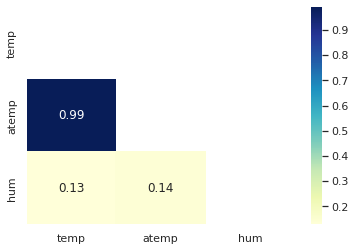

In [211]:
mask = np.triu(np.ones_like(df_clima.corr(), dtype=np.bool))
mask
sns.heatmap(df_clima.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la m√°scara en nuestro plot
           annot = True); 

---

### 10. "Windspeed": encoding

In [212]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [213]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('object')

 - Al utilizar el m√©todo pd.cut nos devuelve una columna categ√≥rica, por eso lo cambiamos a tipo int64. Ahora ya tenemos codificada esta columna.

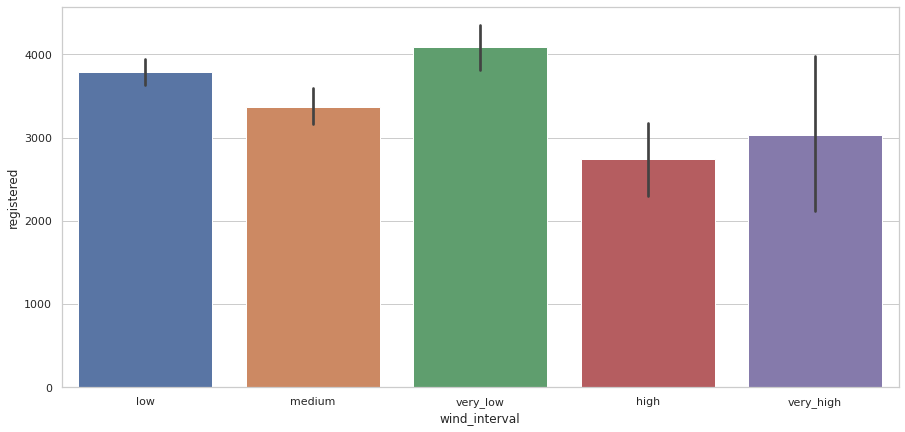

In [214]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="wind_interval", y="registered", data=df_bike)

 - Encoding num√©rico para la columna wind

In [215]:
scale_mapper = {"very low":0, "low":1, "medium":2, 'high':3, 'very high':4}

df_bike['wind_num_encoding'] = df_bike["wind_interval"].replace(scale_mapper)

----

### √öltimas columnas: bicis registradas
- cnt (total por d√≠a)
- registered (reservadas por usuarios registrados)
- casual (bicis alquiladas por usuarios casuales) 

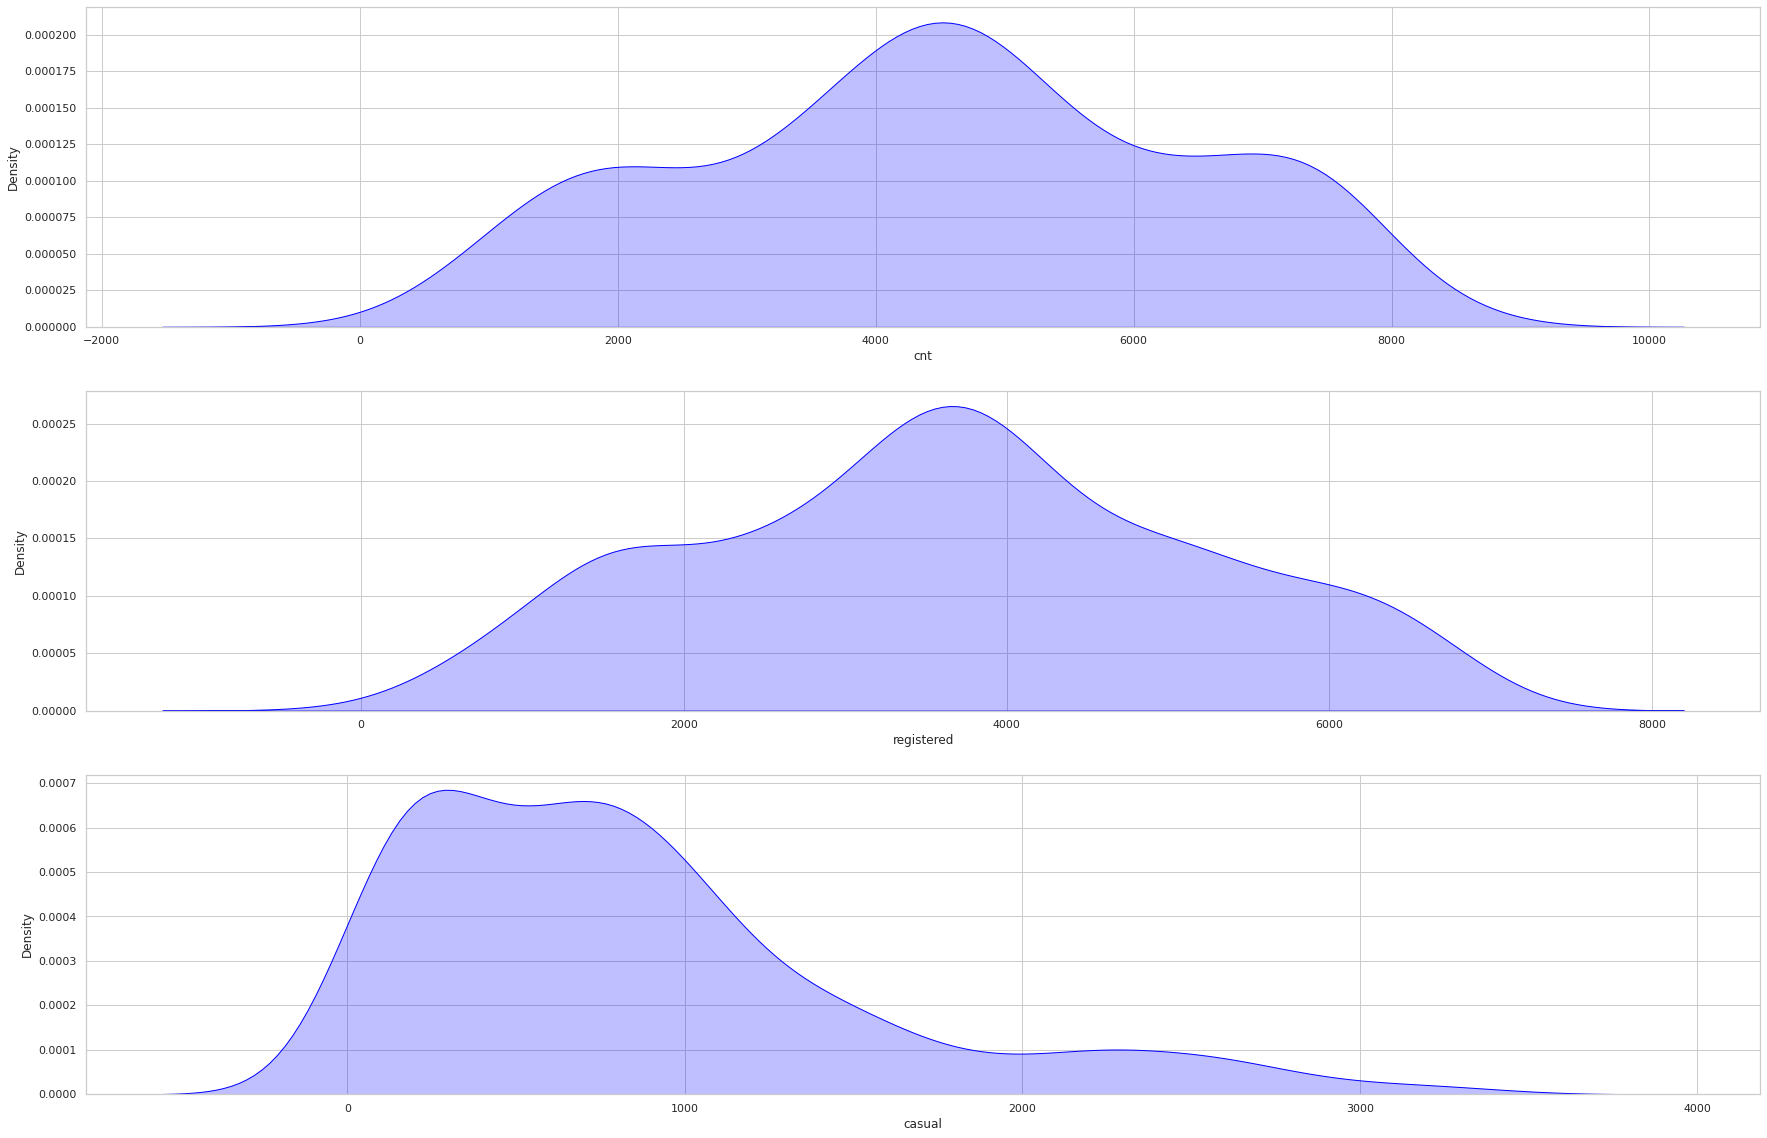

In [216]:
fig, axes= plt.subplots(3,1, figsize= (30, 20))
axes = axes.flat
sns.distplot(df_bike.cnt, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[0])
sns.distplot(df_bike.registered, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[1])
sns.distplot(df_bike.casual, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[2]);


-----

### ELIMINAMOS COLUMNAS SOBRANTES

Despu√©s de este proceso de exploraci√≥n y limpieza decidimos borrar las columnas siguientes:
- Atemp (y sus derivadas) pues sus datos son muy similiares a los de temperatura. Usaremos esta segunda.
- "Dtday": pues ya hemos desglosado esa columna en d√≠a/mes/a√±o
- "Instant": pues funciona como un √≠ndice, y usaremos el √≠ndice del dataframe

In [217]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'day', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_encoding',
       'temp_interval', 'temp_interval_num', 'hum_interval',
       'hum_interval_num', 'temp_interval_ord', 'hum_interval_ord',
       'wind_interval', 'wind_num_encoding'],
      dtype='object')

In [ ]:
df_bike = df_bike.drop(columns= ['instant', 'dteday'], axis=1 )

In [124]:
df_bike.head()

season  yr  mnth  ... hum_interval_ord  wind_interval  wind_num_encoding
0  winter   0     1  ...                5            low                  1
1  winter   0     1  ...                4         medium                  2
2  winter   0     1  ...                3         medium                  2
3  spring   0     1  ...                4            low                  1
4  spring   0     1  ...                3            low                  1

[5 rows x 24 columns]

### REORDENAMOS LAS COLUMNAS:

In [218]:
cols = ['season_encoding', 'season', 'yr', 'mnth', 'day', 'holiday', 'weekday', 'workingday',
                            'weathersit', 'temp', 'temp_interval', 'temp_interval_ord', "temp_interval_num", 'hum', 'hum_interval', 'hum_interval_num','hum_interval_ord', 'windspeed', 'wind_interval', 'wind_num_encoding','casual', 'registered', 'cnt']
len(cols) 

23

In [219]:
df_bike.head(2)

instant     dteday  season  ...  hum_interval_ord  wind_interval wind_num_encoding
0        1 2018-01-01  winter  ...                 5            low                 1
1        2 2018-02-01  winter  ...                 4         medium                 2

[2 rows x 26 columns]

In [220]:
df_bike = df_bike.reindex(columns = cols)

# GUARDAMOS DATAFRAME FINAL

In [222]:
df_bike.to_csv("bikes_post_eda.csv")

------
------
----

# <font color = orange> SPRINT 2 - EMPIEZA LA REGRESI√ìN

In [223]:
df = pd.read_csv("bikes_post_eda.csv", index_col = 0)
df.head()

season_encoding  season  yr  ...  casual  registered   cnt
0                1  winter   0  ...     331         654   985
1                1  winter   0  ...     131         670   801
2                1  winter   0  ...     120        1229  1349
3                1  spring   0  ...     108        1454  1562
4                1  spring   0  ...      82        1518  1600

[5 rows x 23 columns]

# REALIZAMOS DATAFRAME CON VARIABLES PARA PROBAR REGRESI√ìN: solo datos originales // solo encoding

In [224]:
df.columns

Index(['season_encoding', 'season', 'yr', 'mnth', 'day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'temp_interval',
       'temp_interval_ord', 'temp_interval_num', 'hum', 'hum_interval',
       'hum_interval_num', 'hum_interval_ord', 'windspeed', 'wind_interval',
       'wind_num_encoding', 'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df_encoded = [resto] LAURA

In [226]:
df_datos = df[['season', 'yr', 'mnth', 'day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', "hum", "windspeed", 'casual', 'registered', 'cnt']]

df_datos.head(2) ALMU

season  yr  mnth  day  holiday  ...   hum  windspeed  casual  registered  cnt
0  winter   0     1    1        0  ...  80.6  10.749882     331         654  985
1  winter   0     1    2        0  ...  69.6  16.652113     131         670  801

[2 rows x 14 columns]

In [227]:
df_num_datos = df_datos.select_dtypes(include = np.number)
df_num_datos

yr  mnth  day  holiday  weekday  ...   hum  windspeed  casual  registered   cnt
0     0     1    1        0        6  ...  80.6  10.749882     331         654   985
1     0     1    2        0        0  ...  69.6  16.652113     131         670   801
2     0     1    3        0        1  ...  43.7  16.636703     120        1229  1349
3     0     1    4        0        2  ...  59.0  10.739832     108        1454  1562
4     0     1    5        0        3  ...  43.7  12.522300      82        1518  1600
..   ..   ...  ...      ...      ...  ...   ...        ...     ...         ...   ...
725   1    12   27        0        4  ...  65.3  23.458911     247        1867  2114
726   1    12   28        0        5  ...  59.0  10.416557     644        2451  3095
727   1    12   29        0        6  ...  75.3   8.333661     159        1182  1341
728   1    12   30        0        0  ...  48.3  23.500518     364        1432  1796
729   1    12   31        0        1  ...  57.8  10.374682     439        2290  2729

[730 rows x 13 columns]

# OUTLIERS

Hacer un describe

In [ ]:
pd.set_option("display.float_format",lambda x: "%3.f" %x) #Usamos esta linea de c√≥digo para que no aparezca los exponenciales
df.describe().T

NameError: name 'df' is not defined

In [ ]:
df.info()

Tenemos outliers? ¬øQue hacemos con ellos?

PRIMERO SELECCIONA LAS VARIABLES NUM√âRCIAS

In [132]:
df_numericas= df.select_dtypes(include="int64")

In [137]:
len(df_numericas.columns)

13

BOXPLOT PARA VER 

<AxesSubplot:>

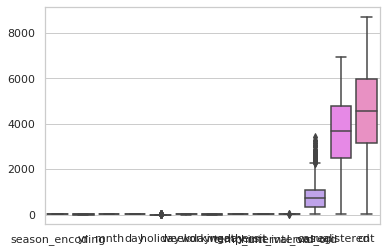

In [140]:
sns.boxplot(data = df_numericas)

In [139]:
fig, axes = plt.subplots(13, 1, figsize=(15,35))
for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df,palette= "YlGnBu", ax=axes[i]); # para trazar una l√≠nea de densidad

plt.show()

VOY A DETECTAR LOS OUTLIERS

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los l√≠mites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo a√±adimos a nuestro diccionario
    
    return dicc_indices 

In [ ]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)
for key, values in ind.items():
    print('Para la variable ' + key  + ' tenemos ' + str(len(values)) +' valores outliers,  esto es un ' + str(round(len(values)/df.shape[0]*100 + '%\ de los datos')

VUELVE A REVISAR EL DESCRIBE PARA VER SI QUIERES SUSTITUIR UN VALOR

In [ ]:
df.describe().T

In [ ]:
# POR SI QUIERO CAMBIAR ALGUNA COLUMNA POR ALGUNA VALOR: DE MEDIANA , MEDIA, MODA
[df["price"].replace({x:71},inplace=True) for x in df["price"]]

#OTRAS OPCIONES
for k,v in ind.items():
    mediana= df[k].median()
    for i in v:
       df.loc[i,k] = mediana 

#OTRAS KNN METODO(VECINOS)


VUELVES A REVISAR BOXPLOT PARA VER SI YA NO TIENES OUTLIERS

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una l√≠nea de densidad

plt.show()

# YA DEBE ESTAR TODO LIMPIO , CON ENCOGING, COLUMNAS NUMERICAS Y CATEGORICAS, TODO COMPLETITO PARA SIGUIENTE PASO

REGRESI√ìN SIMPLE DE LAS 3 VARIABLES DEPENDIENTE :

Y = ¬øCUANTAS BICIS SE RESERVAN EN 2018 Y 2019 EN GENERAL "CNT"?

Y1 = ¬øCUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES registered ? 

Y2= ¬øCUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES CASUAL?

### REGRESION LINEAL MULTIPLE CON VARIABLES NUM√âRICAS Y CATEGORIAS

üö®üö® PRIMERO HAGO UN GROUPBY DE COMO VA A SER MI DF, POR QUE HEMOS INCLUIDO COLUMNAS EXTRAS , REDUNDANTES Y CATEGORICAS, QUE SOLO NOS HAN SERVIDO AL PRINCIPIO PARA LAS GRAFICAS.

In [ ]:

df = df.groupby(['col1', 'col2'])

HACEMOS LA CORRELACION DE LAS VARIABLES INDEPENDIENTES( AQUELLAS A QUIENES PREGUNTAMOS ESPERANDO LA RESPUESTA (Y))

In [ ]:
df.corr()

#solo se puede hacer con variables numericas
# de las mas correlacionadas, ¬øcon cual me quedo? con la mas importante.
# ¬øPuede que nos quedemos con la temperatura y pasamos de la sensacion termica.

In [ ]:
sns.heatmap(numericas.corr()
            cmap="YIGnBu",
            annot= True);

#vamos a ver cual se realaciona mas, en caso que alguna fuera 0,7 o -0,7 eligo entre esas

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numericas.corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

Hacemos una ANOVA, por que a veces nos da informacion, cual es la diferencia entre hacer la anova y un skinlearning.

Objetivos de hacer una anova, por si te sale una variable no significativa pues no la smetemos en la regresi√≥n.

PAra ver de que depende mi modelo-.

In [ ]:
#Limpiamos los outliers , nosotras ya lo hemos hecho arriba

Comprobaci√≥n asunciones

    normalidad: shapiro

In [ ]:
# Normalidad aqui SOLO VEMOS cnt por que es variable respuesta
#SOLO SE NORMALIZA LA RESPUESTA
#¬øSon normales nuestros datos? Podemos verlo con un displot 
# Vemos Shapiro para testear la normalidad de los datos ( kologrov)

# Si shapiro es p> 0,05 no es significativo y nuestros DATOS NORMALES // P< 0,05 valores NO NORMALES no se puede rechazar HO
stats.shapiro (df["cnt"])

In [ ]:
# Si no son normales podemos transformar por : LOG, RAIZ CUADRADA Y BOX COX(
df["cnt"],lambda_ajustada= stats.boxcox(df["cnt"])

In [ ]:
#Hacemos de nuevo el shapiro a ver si lo hemos normalizado
stats.shapiro (df["cnt"])

    homocedasticidad :  test levene

    pvalor < 0,05 NO SIGNIFICATIVO, CUMPLE ASUNCI√ìN , TIENEN VARIANZAS SIMILARES
    P valor > 0,05 SIGNIFICATIVO , no cumple asunci√≥n, NO TIENEN VARIANZAS SIMILARES

    

In [ ]:
#se aplica a categoricas y numericas
#primera categoricas

fig,axes = plt.subplots(1,4,figsize =(30,10))

axes= axes.float

colum_cat= df.select_dtypes(include=["object", "category"]).lista_columnas

for i,col in enumerate(colum_cat):
    sns,boxplot(
        x= col,
        y= "cnt",
        data= df_bike,
        palette= "tab10",
        ax= axes[i]
    )

In [ ]:
def datos_test_levene(columan,df):
    valoresr=df[columna].unique()
    d= {}

for x in valroes:
    d[x]= df[df(columna) == x]["cnt"]

Aqui nos saca los diferentes Dataframes

In [ ]:
sexo= detectar_test_levene("temperatura",df) #esta sobre la categorica creada low, high,...
smoker= detectar_test_levene("viento",df)
region= detectar_test_levene("humedad",df)
hijos= detectar_test_levene("season",df)

Ahora comprobamos levene para estos Df

In [ ]:
stats.levene(temperatura[0], temperatura[1], temperatura[2], temperatura[3], center = "median")
stats.levene(viento["low"], viento["high"], viento["2"], viento["3"], center = "median")
stats.levene(humedad["low"], humedad["high"], humedad["2"], humedad["3"], center = "median")
stats.levene(season["low"], season["high"], season["2"], season["3"], center = "median")

#ejemplo
levene_hijos = stats.levene(hijos['1'], hijos['2'], hijos['3'], hijos['4'], hijos['5'],  center='median')
levene_hijos

¬øCuantas de las variables categoricas cumplen homo? SI son todas genial, si no son todas, hay algunas hetero, estas hetero no deberiamos incluirlas en regresion lineal. Las ELIMINAMOS DEL DF, que vamos a presentar a la regresion.
Si solo tienes 1 homo, puedes plantear cambiar de modelo.

HOmocedasticidad PARA NUMERICAS

In [ ]:
numericas.head()

In [ ]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# definimos una lista de colores. Cada color corresponder√° a una gr√°fica
lista_colores = ["cadetblue", "seagreen"]

# hemos creado una gr√°fica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el m√©todo .flat. Lo que hace es aplanar los ejes para que queden en una √∫nica dimensi√≥n
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('charges', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma l√≠nea de c√≥digo muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'charges',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])

fig.tight_layout();

#¬øComo vemos con este grafico las variables numericas, son homocedasticas?
#Todos los puntos deben estar alrededor de ma media Y = 0, tanto por arriba como por abajo. SON HOMOCEDASTICOS
#Si es tipo enbudo NO SON HOMOCEDASTICOS

In [ ]:
numericas.head()

In [ ]:
resultados= {}

numer= numericas.columns.drop(["children","charges"]) #hemos quitado esta por que ya es categorica

for col in numer:
    stat,p_value = levene(df[col], df.charges,center="median")

    resultados[col]= p_value

In [ ]:
resultados # aqui nos da los resutlados y podemos ver si son o no Homo

    Asuncion de independencia

    -
     MIS DATOS DEBEN SER INDEPENDIENTES ENTRE ELLOS (ES LO QUE BUSCAMOS)  chi- Cuadrado
     comparamos cnt(respuesta) con cada una de las variables independientes.

     PVALUE> 0,05 NUESTRAS VARIABLES SON INDEPENDIENTES
     PVALUE< 0,05 NO SON INDEPENDIENTES

     CRAMER TE DICE SI SON FUERTES O DEBILES  CERCA DE 0,6 ES FUERTE - 0,2 ES DEBIL

In [ ]:
columas = df.lista_columns
columnas

In [ ]:
combinaciones= list(itertools.combinations(columnas,2))#combinaciones de 2 en dos
combinaciones #te las da sin repeticion

In [ ]:
for par in combinaciones:
    crosstab,test_result, expected= rp.crosstab(df[par[0]],df[par[1]],
                                                test= "chi-square",
                                                expected_freqs=True,
                                                prop= "cell")

print("----------------", par[0]," + " , par[1],"-------------------")
print(test_results)

# AQUI VAMOS A VER QUIENES SON INDEPENDIENTES Y QUIENES NO
#¬øQUE HACEMOS CON ELLAS? LAS QUITAMOS DEL MODELO O LAS TRANSFORMAMOS ¬øTIENE SENTIDO? PERDEMOS SENTIDO EN NUESTRO DATASET

    ANOVA lo hacemos para ver nivel de significancia de mi variable respuesta, con las independientes.
    #Vamos a meter todas variables y para comprobar quien tiene mucho significado

In [ ]:
ls= ols("charge - sex + bmi + children",data=df).fit()
sm.stats.anova_lm(ls)

ls.summary() # esto es lo importante  R-square-

# miro R.square : 0.111,...esto es la % de probabilidad que tiene este conjunto de variables independientes
#  de contestar a mi variable respuesta

# si pvalor< 0,05 entonces es significativa para la prediccion 
# OJO al intercept que es el punto de referencia. Va a coger por orden alfabeticos de las variables categoricas.

#¬øQue informacion importante?
#coef podemos ver como la intensidad en la que influye
#pvalor < 0,05

    HACER VIF

In [ ]:
VIF

# cercano a 1 no hay relaci√≥n
# de 1 a 5 relaci√≥n moderada
# mas de 5 fuerte relacion

    ENCODING

In [ ]:
#¬øTIENE ORDEN O NO? ¬øSobre que  columnas hacemos encoding? 
#Orden= dummies para aquellas dnd no hay diferencias entre sus categorias / one hot, para aquellas dnd si haya mucha diferencia entre sus categorias.
#(Por lo que hay que ver primero las diferencas entre columnas y si misma)
# si tiene orden= label, map ordinal

In [ ]:
dummies_sex = pd.get_dummies(df["sex"], prefix_sep= "_", prefix="sex", dtype=int)

In [ ]:
df[dummies_sex.columns] = dummies_sex

In [ ]:
#Aqui eliminamos las categoricas que estan en object
df.drop(["sex", "region"]axis=1,inplace=True)

In [ ]:
#utilizamos  map por que solo tiene una categoria
mapa= {"no":0, "yes":1}

df["smoker"]= df["smoker"].map(mapa)


### ANTES DEBERIAMOS HACER UN ENCODING A LAS CATEGORICAS, SI NO, NO ACEPTAR√Å ESTOS DATOS

### NO TENEMOS POR QUE ESTANDARIZAR

In [ ]:
df_copia = df.copy()

# iniciamos el m√©todo
le = LabelEncoder()

# lo aplicamos a todo nuestro dataframe 
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])



### REGRESION MULTIPLE LINEAL: QUEREMOS SABER EL NUMERO TOTAL DE RESERVAS DE BICIS Y SI LAS VARIABLES INDEPENDIENTES, NOS AYUDAN A CONOCERLO Y EN QUE MEDIDA, SEG√öN LA RESPUESTA DEL MODELO.

In [ ]:
x =df_numericas.drop(columns = ['cnt','registered', 'casual' ]) #Quitamos nuestra variable dependiente.
y = df_numericas['cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresi√≥n lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las m√©ticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las m√©tricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

In [ ]:
y_pred_test.reset_index(inplace=True) # Se me crea nueva columna y luego la dropeo

    FORMA DE ANA

In [ ]:
x =df_numericas.drop(columns = ['cnt','registered', 'casual' ]) #Quitamos nuestra variable dependiente.
y = df_numericas['cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresi√≥n lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)

In [ ]:
#obligatorio definir antes para la fincion
y_prep_test= lr.predict(x_test)
y_prep_train = lr.predict(x_train)

In [ ]:
def metricas(y_test, y_train, y_test_pred, y_train_pred):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    return df

    #nos fijamos en el rmse y rcuadrado
    #RMSE es cuanto me equivoco

In [ ]:
result= metricas(y_test,y_train,y_pred_train,y_pred_test ) # y me dice los resultados de train y test
#el RMSE puede ser positivo o negativo en funcion del problema, hay que mirar con un describe max y min
result

In [ ]:
results.style.background_gradient(cmap="coolwarm") # te da de colores DF

In [ ]:
#¬øCuando ocurre overfiting? Cuando se ha aprendido de memoria mis datos

#cuando las metricas en en train sean mucho mejores que en test rcuadrados altos y rmse bajos
#underfiting lo contrario
#ambas es que hay un modelo predictivo basura

# se soluciona a√±adiendo variables predictoras (aprende a coser con una prenda, o aprende con muchas prendas)
#over mas datos y menos variables predictoras
#under mas filas en nuestro df y mas variables predictoras

#no queremos ninguno de los dos

UNA VEZ QUE CONOZCAMOS ESTOS DATOS, PODEMOS VER SI PODRIAN MEJORAR Y DEBEMOS ESTANDARIZAR Y PROBAR DE NUEVO